### SparklyRGT Template: Baseline and Acquisition Analysis 

**Requirements**
* The data must be an excel file from MEDPC2XL (trial by trial data) 
* The data, sparklyRGT.py file, and this notebook must all be in the same folder

**Getting started: Please make a copy of this (sparklyRGT_template_2) for each analysis**
- Refer to sparklyRGT_documentation for function information
- Note: depending on your analysis, you will only have to complete certain sections of the sparklyRGT_documentation
- Note: feel free to create a personal template once you've become comfortable - this is just an example

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats
os.chdir('..')
import sparklyRGT as rgt 
# import model_data as md
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows',100)

I am being executed!


C:\Users\brett\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [20]:
%load_ext autoreload
%autoreload 2

***

# 1) Load data into Python



In [2]:
#checks current working directory
os.getcwd()

#changes working directory to whatever is included in brackets
os.chdir("C:\\Users\\brett\\sparklyRGT\\data") 
# os.chdir('/home/brett/sparklyRGT/data')

In [4]:
# #CH01 must be loaded in separately to drop the forced choice session that was accidentally included
# #for four rats

# fnames2 = ['CH01_raw-free_S8-19.xlsx']

# df2 = rgt.load_data(fnames2)
# #drop forced choice session:
# rgt.drop_sessions(df2, [6])
# #reset the session numbers to start from 1:
# rgt.edit_sessions(df2, orig_sess = list(range(8,20)),new_sess = list(range(1,13)))

In [5]:
# #set these variables for extracting the data using the model_data python script

# fnames = ['BH09_raw-free_S1-5_corrected.xlsx','CH02_raw-free_S8-15.xlsx','NA01_raw_free-choice_S8-18.xlsx']
# #change these to the names of the excel files that you want to run modeling on 

# #load in excel files into one df, resetting the session numbers to start at 1
# df1 = rgt.load_multiple_data(fnames, reset_sessions = True)



In [6]:
# rgt.check_sessions(df1)

In [7]:
# df = pd.concat([df1,df2], ignore_index = True)


In [3]:
fnames = ['BH09_raw-free_S1-10.xlsx','CH02_corrected.xlsx','NA01_raw_free-choice_S8-18.xlsx',"CH01_corrected.xlsx"]
df = rgt.load_multiple_data(fnames, reset_sessions = True)


In [4]:
#creates lists of subjects run on each task (classic A, classic B, etc.)

#rename MSNs so that the rats on the outcome task don't have "loss" in the MSN
for i in range(len(df)):
    if df.at[i, 'MSN'] == 'LossrGT_A-losscue_v1':
        df.at[i,'MSN'] = 'outcomeRGT_A'
    if df.at[i, 'MSN'] == 'LossrGT_B-losscue_v1':
        df.at[i,'MSN'] = 'outcomeRGT_B'
        
#rename MSNs so that the rats on the random task don't have "loss" in the MSN
for i in range(len(df)):
    if df.at[i,'MSN'] == 'AnarchyrGT_B-losscue_v6':
        df.at[i,'MSN'] = 'RandomRGT_B'
    if df.at[i,'MSN'] == 'AnarchyrGT_A-losscue_v6':
        df.at[i,'MSN'] = 'RandomRGT_A'
        
        
task_list = df.groupby(['MSN'])['Subject'].unique()

In [5]:
#these lines of code concatenates together the lists of subjects that run the same task (i.e., puts version A 
#and version B together) - based on unique string for each task name
uncued_subs = np.concatenate(task_list[[task for task in df.MSN.unique() if 'Classic' in task]])
standard_subs = np.concatenate((task_list['rGT_A-cue'], task_list['rGT_B-cue']))
#concatenating together MisRGT tasks, and RevRGT tasks, as they both refer to reverse-cue RGT
reverse_subs = np.concatenate((np.concatenate(task_list[[task for task in df.MSN.unique() if 'Mis' in task]]),
                              np.concatenate(task_list[[task for task in df.MSN.unique() if 'Rev' in task]])))
outcome_subs = np.concatenate(task_list[[task for task in df.MSN.unique() if 'outcome' in task]])
random_subs = np.concatenate(task_list[[task for task in df.MSN.unique() if 'Random' in task]])
loss_subs = np.concatenate(task_list[[task for task in df.MSN.unique() if 'oss' in task]])

subs = [uncued_subs,standard_subs, reverse_subs, outcome_subs,random_subs,loss_subs]

***
# 2A) Baseline & Acquisition Analysis


In [6]:
group_names = {0: 'Uncued',
              1: 'Standard',
              2: 'Reverse',
              3: 'Outcome',
              4: 'Random', 
              5: 'Loss'} 

group_list = [uncued_subs,standard_subs, reverse_subs, outcome_subs,random_subs,loss_subs]

title = 'Cue manipulation' #for plotting

startsess = 1 #first session you would like to include in figures
endsess = 8 #last session you would like to include in figures

## Data cleaning

### Check session numbers for each rat

In [12]:
rgt.check_sessions(df)

Subject  StartDate            Session
101      2021-06-29 00:00:00  1          104.0
         2021-06-30 00:00:00  2          155.0
         2021-07-01 00:00:00  3          137.0
         2021-07-02 00:00:00  4          128.0
         2021-07-05 00:00:00  5          128.0
102      2021-06-29 00:00:00  1          102.0
         2021-06-30 00:00:00  2          129.0
         2021-07-01 00:00:00  3           83.0
         2021-07-02 00:00:00  4          112.0
         2021-07-05 00:00:00  5           75.1
103      2021-06-29 00:00:00  1           57.0
         2021-06-30 00:00:00  2           84.0
         2021-07-01 00:00:00  3           62.0
         2021-07-02 00:00:00  4           57.0
         2021-07-05 00:00:00  5           58.0
104      2021-06-29 00:00:00  1           75.0
         2021-06-30 00:00:00  2           70.0
         2021-07-01 00:00:00  3           77.1
         2021-07-02 00:00:00  4           46.0
         2021-07-05 00:00:00  5           58.0
105      2021-06-29 00

### Drop/edit session numbers

In [13]:
# df2 = rgt.drop_sessions(df, [6])
# df2 = rgt.edit_sessions(df, orig_sess = [0], new_sess = [15], subs = "all")

In [10]:
df.Session.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 10, 12], dtype=int64)

### Check that you dropped/edited the desired session(s)

In [14]:
# rgt.check_sessions(df2) 

## Data processing

### Calculate variables for each rat


In [7]:
df_sum = rgt.get_summary_data(df) #change to df instead of df2 if you didn't do any session editing

In [14]:
df_sum.iloc[loss_subs]['choice_lat1']

319    1.430500
323    2.871852
427    0.665833
431    2.064091
320    1.002778
324    2.365660
404    0.944000
328    1.045400
332    2.960484
428    1.477473
432    0.623396
436    1.432970
440    0.993140
312    1.432400
316    3.933654
420    1.511594
424    0.689655
408    1.327159
403    1.016627
327    2.510145
331    1.844625
435    1.485753
439    1.246176
311    3.328889
315    2.243188
419    1.448254
423    1.237917
407    0.940000
Name: choice_lat1, dtype: float64

### Get the risk status of the rats


In [8]:
df_sum, risky, optimal = rgt.get_risk_status(df_sum, 5, 8)

print(df_sum[['mean_risk','risk_status']]) 
print(risky, optimal) 

     mean_risk  risk_status
101  96.516859          1.0
102  76.900330          1.0
103 -36.779279          2.0
104  -4.126603          2.0
105  79.244497          1.0
..         ...          ...
444  34.082001          1.0
445  91.386245          1.0
446  34.430477          1.0
447  41.625102          1.0
448  90.011731          1.0

[165 rows x 2 columns]
[103, 104, 125, 138, 160, 205, 207, 217, 221, 225, 227, 231, 306, 318, 323, 327, 420, 425, 432, 433, 439, 441] [101, 102, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 201, 202, 203, 204, 209, 210, 211, 214, 215, 216, 218, 219, 220, 222, 223, 224, 226, 228, 229, 230, 301, 302, 303, 304, 305, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 319, 320, 321, 322, 324, 325, 326, 328, 329, 330, 331

### Export your data to an Excel file 


In [17]:
# rgt.export_to_excel(df_sum, groups = group_list, column_name = '', new_file_name = '', asin = True)

## Calculate means and SEMs for your experimental groups



In [9]:
mean_scores, SEM = rgt.get_means_sem(df_sum, groups = group_list, group_names = group_names)
mean_scores
# SEM

,1P1,1P2,1P3,1P4,2P1,2P2,2P3,2P4,3P1,3P2,...,prem5,prem6,prem7,prem8,prem9,prem10,prem11,prem12,mean_risk,risk_status
Uncued,38.5103,37.3686,14.3425,9.77854,38.7897,44.7755,8.91324,7.52165,37.2344,48.188,...,26.5633,22.9248,19.6032,18.2633,26.9221,24.1636,24.8914,23.6908,76.3338,1
Standard,32.3508,33.3322,18.4061,15.911,30.8003,35.0933,16.9034,17.203,28.0232,36.9881,...,33.8783,32.1835,33.7255,32.2708,35.7745,32.8765,30.9139,33.0943,30.5023,1.25
Reverse,34.5916,35.9486,18.0901,11.3697,33.9872,39.3344,16.8033,9.87513,32.7428,43.7344,...,33.1927,30.6616,29.8661,28.7312,31.8131,41.8362,28.3887,32.9955,52.1406,1.14286
Outcome,24.7875,39.0196,22.4822,13.7107,26.5449,42.356,20,11.0992,23.301,46.0871,...,28.2217,30.1154,33.0794,27.0926,25.292,NaN,28.5403,NaN,37.1638,1.24
Random,41.4976,32.5706,14.727,11.2049,41.5945,35.6629,14.1222,8.62038,35.1432,44.1527,...,22.2134,18.6414,18.7794,15.2662,16.0472,22.8944,18.1379,NaN,65.6144,1.10714
Loss,33.8815,42.2158,16.2889,7.61377,33.1778,48.9092,12.1985,5.71458,33.1741,53.0079,...,23.1957,19.5371,18.65,14.0491,17.3684,NaN,16.0204,NaN,82.2644,1.03571


# 2B) Baseline & Acquisition Analysis: Plotting


## Bar plot of P1-P4 % choice


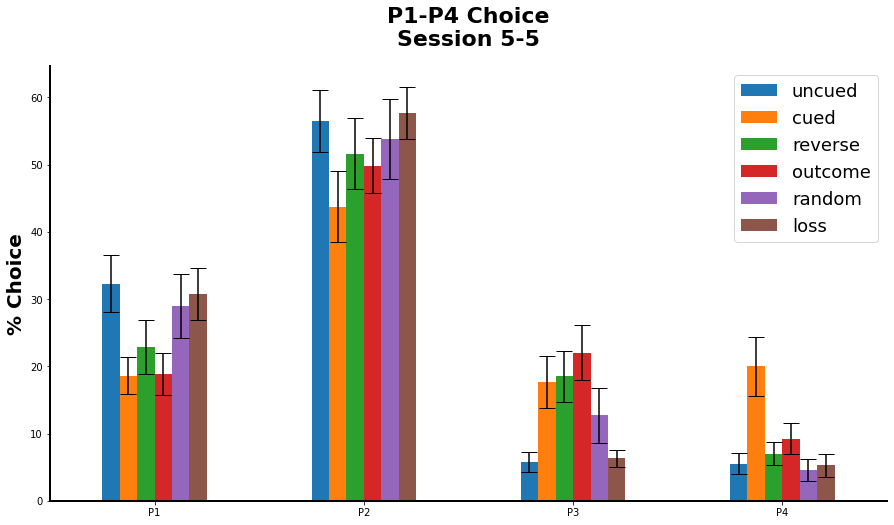

In [19]:
rgt.choice_bar_plot(endsess, endsess, mean_scores, SEM)

#To save figure:
# plt.savefig('BH07 Choice S29-30',facecolor = 'white')

## Line plot of other variables


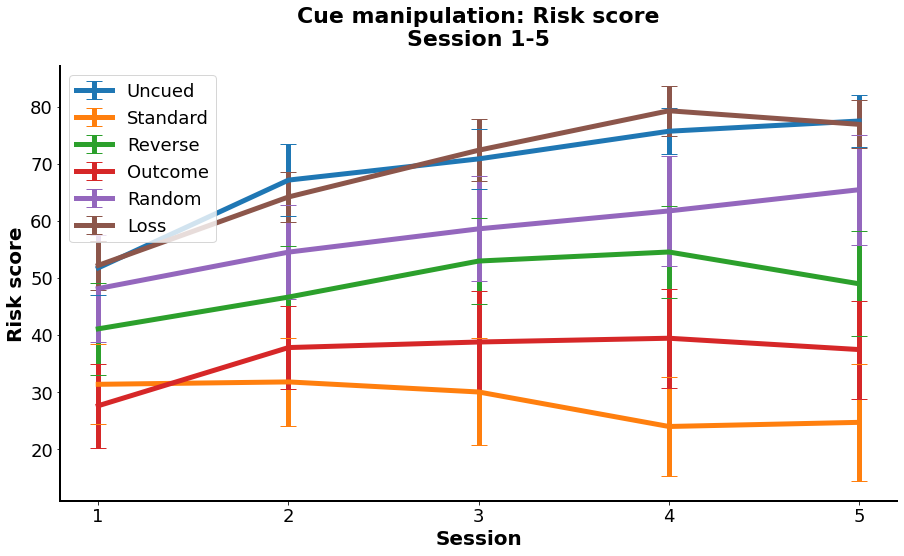

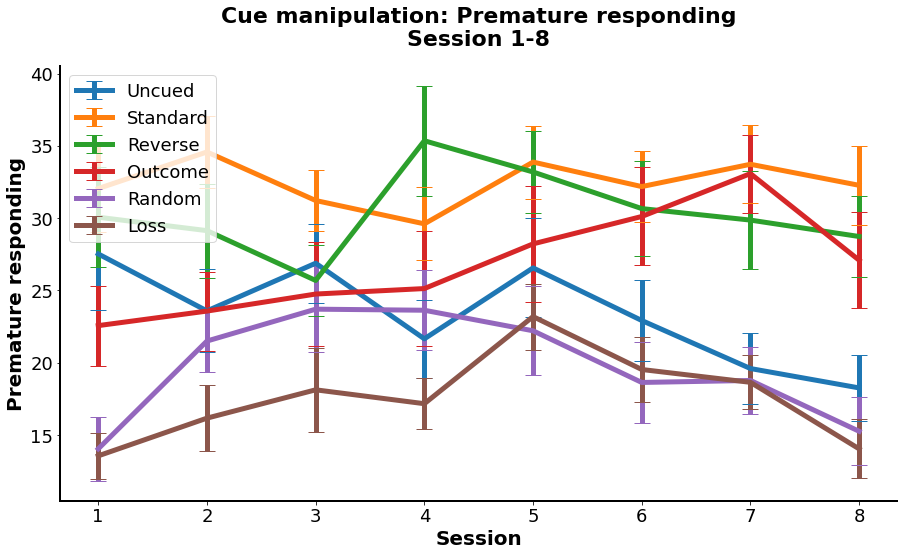

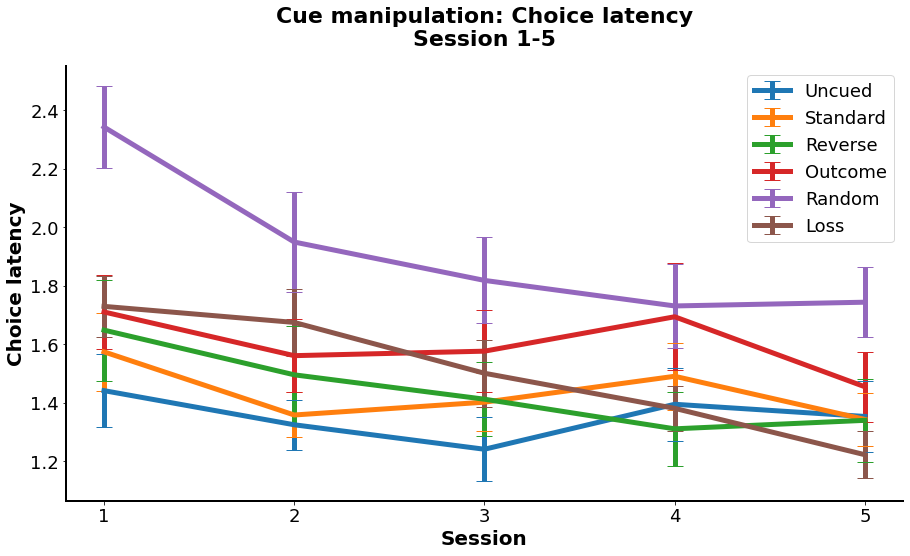

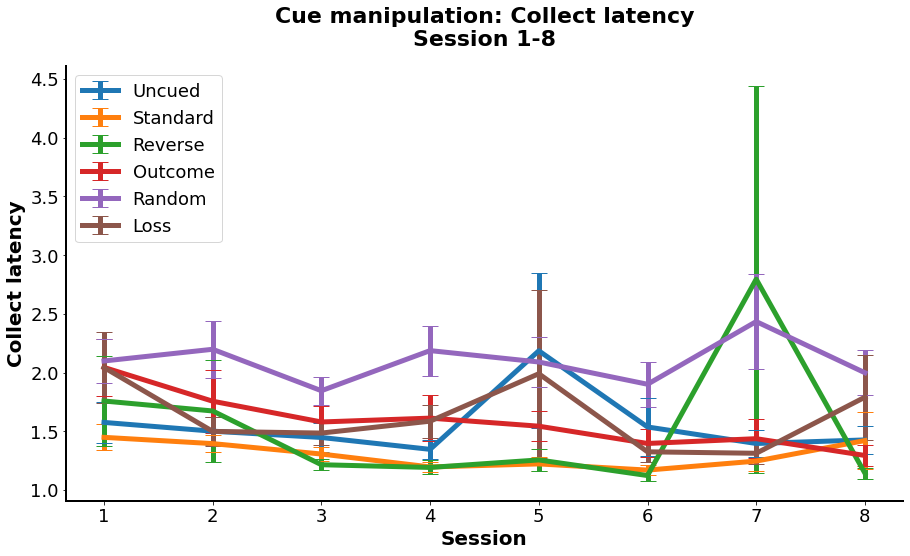

In [15]:
rgt.rgt_plot('risk', 1, 5, title, mean_scores, SEM, group_names = group_names, y_label = 'Risk score') 
#plt.savefig('rgt variants - risk score S1-5',facecolor = 'white')

rgt.rgt_plot('prem', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Premature responding')
rgt.rgt_plot('choice_lat', startsess, 5, title, mean_scores, SEM, group_names = group_names, y_label = 'Choice latency')
rgt.rgt_plot('collect_lat', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Collect latency')


## Bar plot of other variables



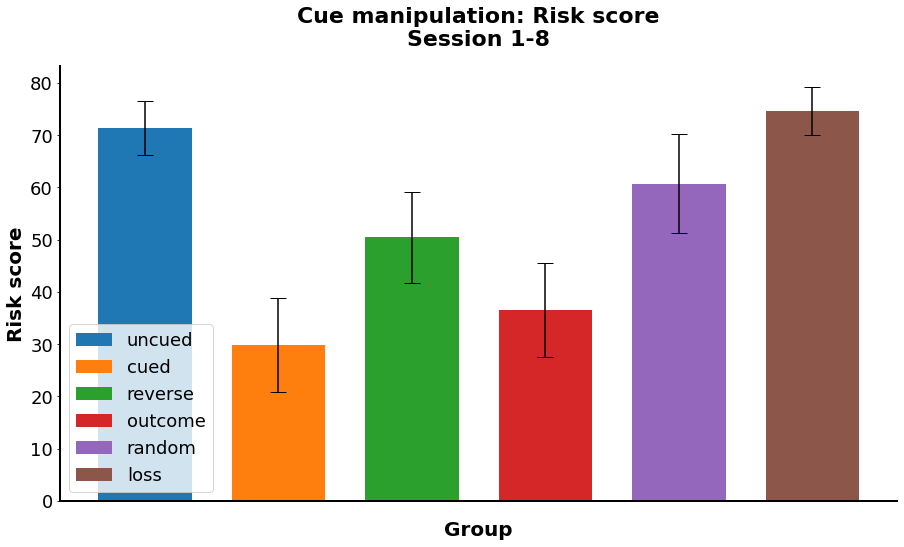

In [17]:
rgt.rgt_bar_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Risk score')

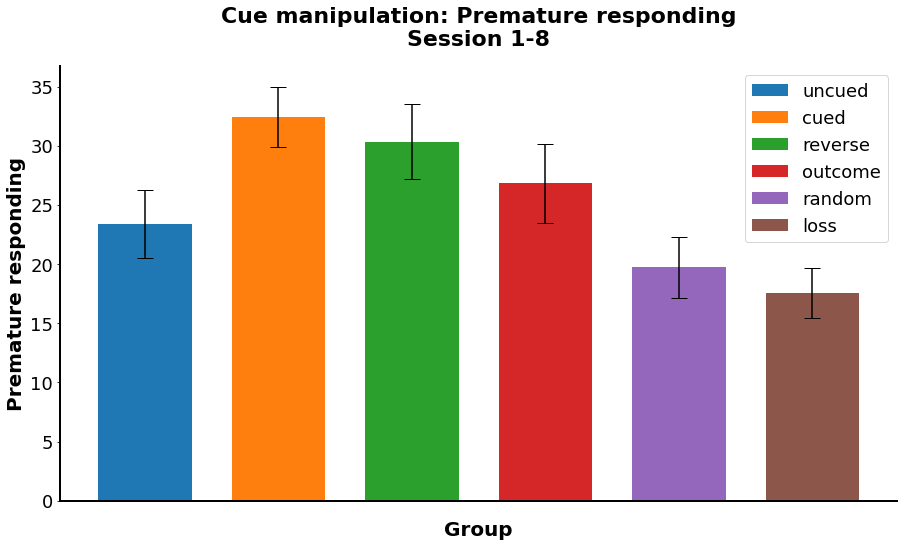

In [19]:
rgt.rgt_bar_plot('prem', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Premature responding')

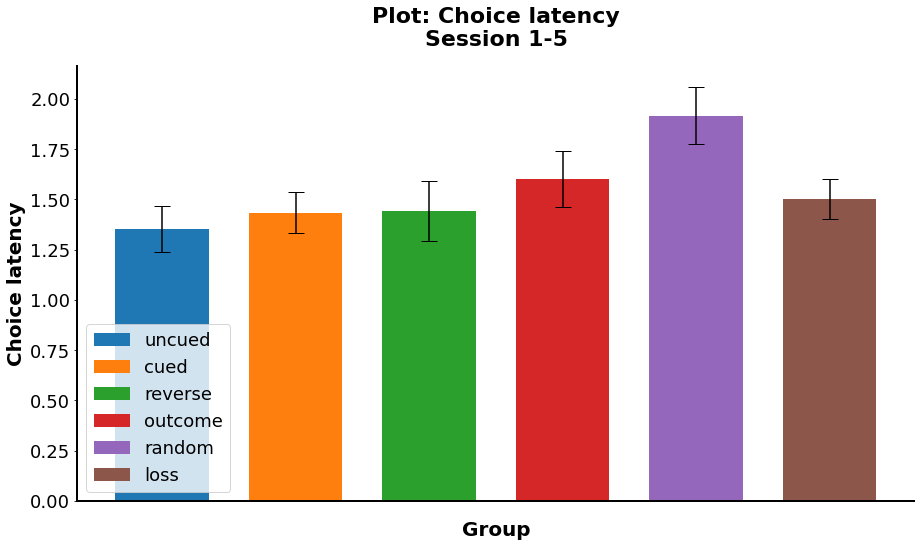

In [23]:
rgt.rgt_bar_plot('choice_lat', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Choice latency')

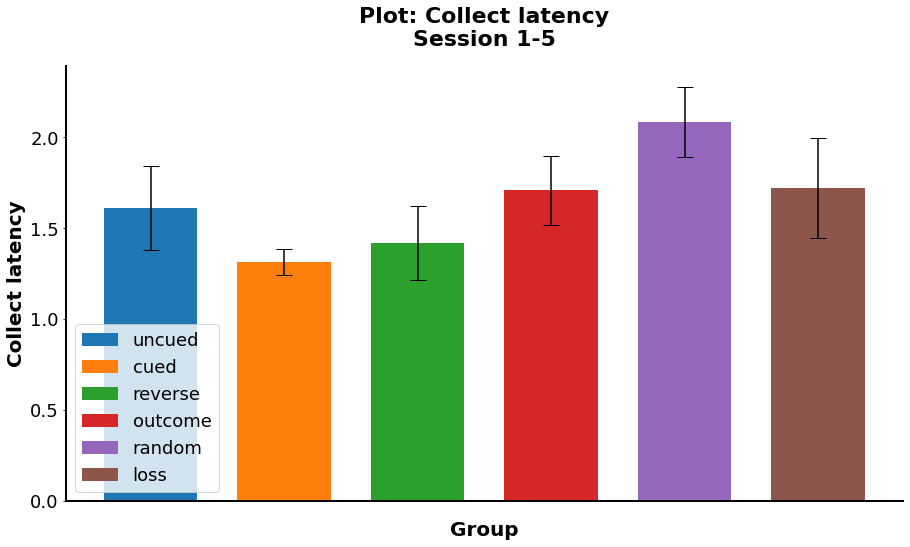

In [24]:
rgt.rgt_bar_plot('collect_lat', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Collect latency')

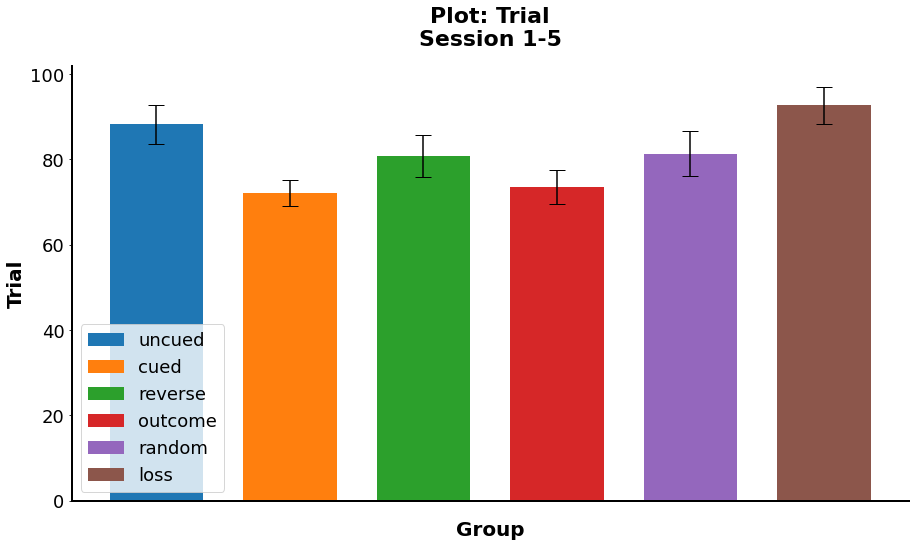

In [25]:
rgt.rgt_bar_plot('trial', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Trial')